In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:/Random/SCAII/archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/Random/SCAII/archive/melanoma-cancer-detection.ipynb
D:/Random/SCAII/archive/test\Benign\6299.jpg
D:/Random/SCAII/archive/test\Benign\6300.jpg
D:/Random/SCAII/archive/test\Benign\6301.jpg
D:/Random/SCAII/archive/test\Benign\6302.jpg
D:/Random/SCAII/archive/test\Benign\6303.jpg
D:/Random/SCAII/archive/test\Benign\6304.jpg
D:/Random/SCAII/archive/test\Benign\6305.jpg
D:/Random/SCAII/archive/test\Benign\6306.jpg
D:/Random/SCAII/archive/test\Benign\6307.jpg
D:/Random/SCAII/archive/test\Benign\6308.jpg
D:/Random/SCAII/archive/test\Benign\6309.jpg
D:/Random/SCAII/archive/test\Benign\6310.jpg
D:/Random/SCAII/archive/test\Benign\6311.jpg
D:/Random/SCAII/archive/test\Benign\6312.jpg
D:/Random/SCAII/archive/test\Benign\6313.jpg
D:/Random/SCAII/archive/test\Benign\6314.jpg
D:/Random/SCAII/archive/test\Benign\6315.jpg
D:/Random/SCAII/archive/test\Benign\6316.jpg
D:/Random/SCAII/archive/test\Benign\6317.jpg
D:/Random/SCAII/archive/test\Benign\6318.jpg
D:/Random/SCAII/archive/test\Benign\6319.jpg

In [2]:
malignant_dir = 'D:/Random/SCAII/archive/train/Malignant'
benign_dir = 'D:/Random/SCAII/archive/train/Benign'

In [3]:
def load_image_paths_labels(malignant_dir, benign_dir):
    malignant_images = [(os.path.join(malignant_dir, img), 'Malignant') for img in os.listdir(malignant_dir)]
    benign_images = [(os.path.join(benign_dir, img), 'Benign') for img in os.listdir(benign_dir)]
    images_labels = malignant_images + benign_images
    return images_labels

In [4]:
image_data = load_image_paths_labels(malignant_dir, benign_dir)

In [5]:
df = pd.DataFrame(image_data, columns=['image_path', 'label'])

In [6]:
df.head()

,image_path,label
0,D:/Random/SCAII/archive/train/Malignant\1.jpg,Malignant
1,D:/Random/SCAII/archive/train/Malignant\10.jpg,Malignant
2,D:/Random/SCAII/archive/train/Malignant\100.jpg,Malignant
3,D:/Random/SCAII/archive/train/Malignant\1000.jpg,Malignant
4,D:/Random/SCAII/archive/train/Malignant\1001.jpg,Malignant


In [7]:
df.tail()

,image_path,label
11874,D:/Random/SCAII/archive/train/Benign\995.jpg,Benign
11875,D:/Random/SCAII/archive/train/Benign\996.jpg,Benign
11876,D:/Random/SCAII/archive/train/Benign\997.jpg,Benign
11877,D:/Random/SCAII/archive/train/Benign\998.jpg,Benign
11878,D:/Random/SCAII/archive/train/Benign\999.jpg,Benign


In [8]:
df.shape

(11879, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
df['label'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [13]:
df['label'].value_counts()

label
Benign       6289
Malignant    5590
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abhis\AppData\Local\Temp\ipykernel_30696\82091035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='hls')


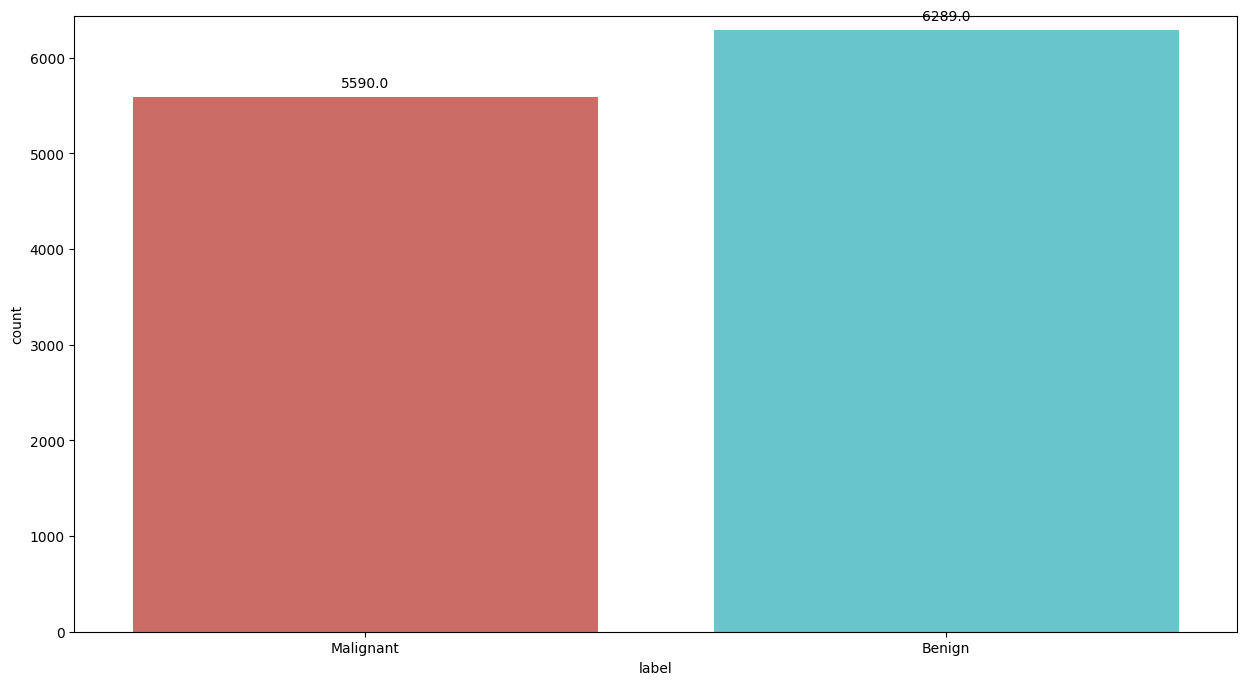

In [16]:
plt.figure(figsize=(15, 8))  

ax = sns.countplot(x='label', data=df, palette='hls')
ax.set_ylim(0, df['label'].value_counts().max() + 150)  

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 10),  
                textcoords='offset points', ha='center', va='center')

plt.show()

In [17]:
label_counts = df['label'].value_counts()

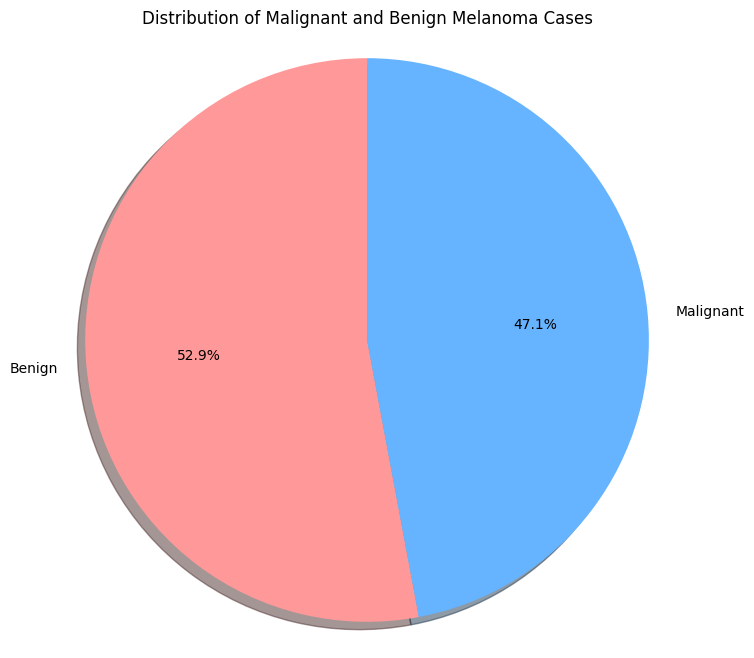

In [18]:
plt.figure(figsize=(8, 8)) 

plt.pie(label_counts, 
        labels=label_counts.index, 
        autopct='%1.1f%%',          
        startangle=90,             
        colors=['#ff9999','#66b3ff'], 
        shadow=True)           

plt.axis('equal')  
plt.title('Distribution of Malignant and Benign Melanoma Cases')
plt.show()

In [19]:
malignant_images = os.listdir(malignant_dir)
benign_images = os.listdir(benign_dir)

malignant_sample = np.random.choice(malignant_images, 5, replace=False)
benign_sample = np.random.choice(benign_images, 5, replace=False)

In [20]:
import matplotlib.image as mpimg

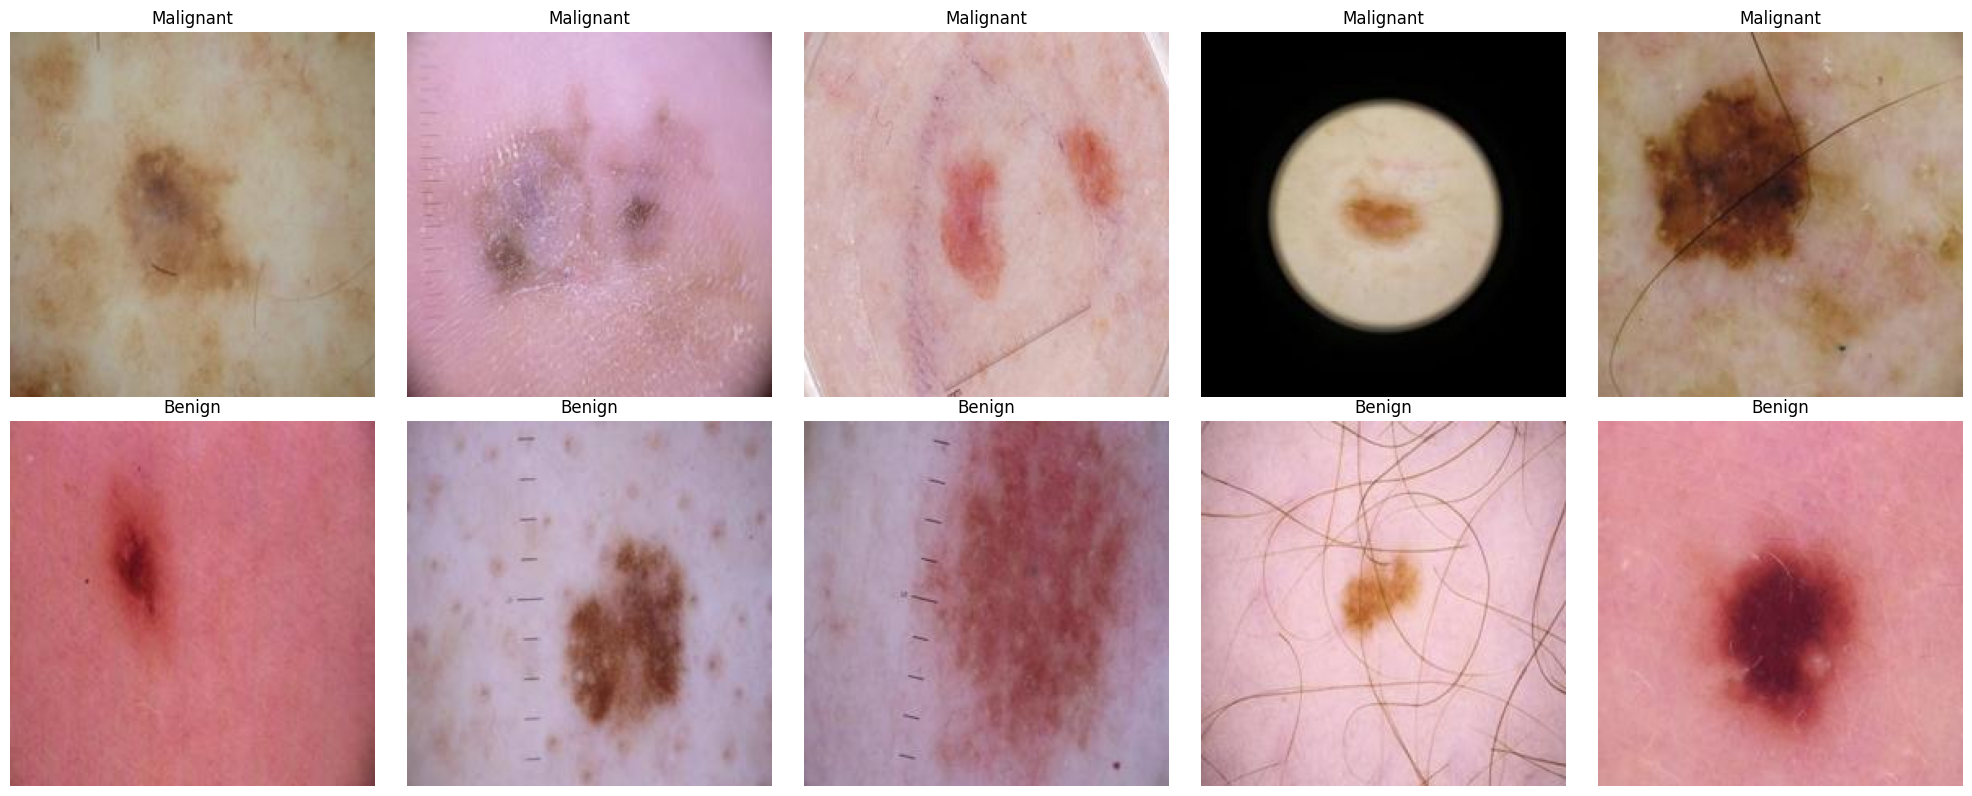

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 

for ax, img_name in zip(axes[0], malignant_sample):
    img_path = os.path.join(malignant_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Malignant')

for ax, img_name in zip(axes[1], benign_sample):
    img_path = os.path.join(benign_dir, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title('Benign')

plt.tight_layout()
plt.show()

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['label'])

In [25]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['label'] = y_resampled

In [26]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Malignant    6289
Benign       6289
Name: count, dtype: int64


In [27]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [28]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label'] 
)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='label',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='label',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 10062 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.
Found 1258 validated image filenames belonging to 2 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [32]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)   

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [33]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 143s 226ms/step - accuracy: 0.7391 - loss: 0.5621 - val_accuracy: 0.8482 - val_loss: 0.4193
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.8348 - loss: 0.3883 - val_accuracy: 0.8188 - val_loss: 0.4097
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.8398 - loss: 0.3633 - val_accuracy: 0.8617 - val_loss: 0.3366
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.8592 - loss: 0.3279 - val_accuracy: 0.8529 - val_loss: 0.3494
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 128s 203ms/step - accuracy: 0.8591 - loss: 0.3139 - val_accuracy: 0.8609 - val_loss: 0.3271
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.8700 - loss: 0.2936 - val_accuracy: 0.8561 - val_loss: 0.3336
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 127s 201ms/step - accuracy: 0.8632 - loss: 0.3046 - val_accuracy: 0.8585 - val_loss: 0.3499
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 127s 201ms/step - accuracy: 0.8796 -

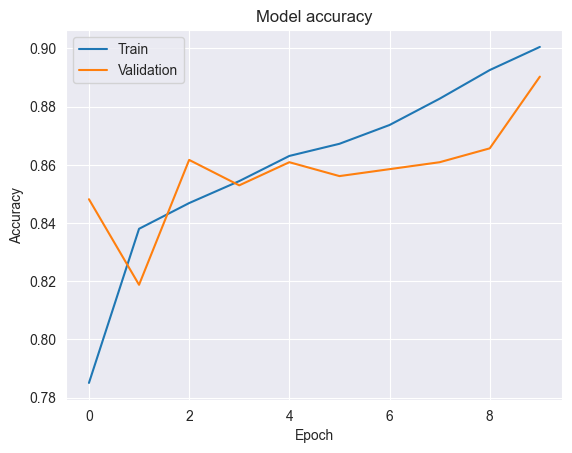

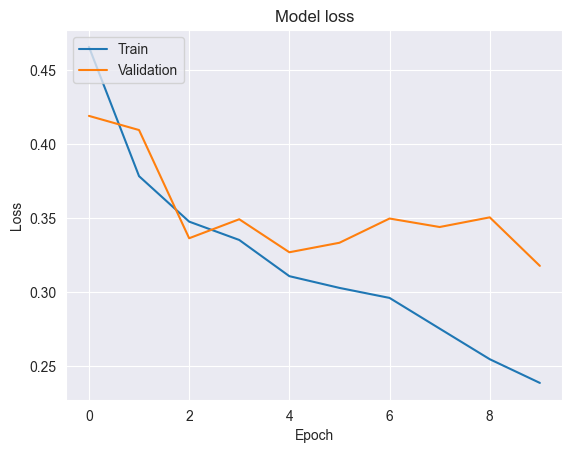

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step


In [38]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.89      0.83      0.86       629
   Malignant       0.84      0.90      0.87       629

    accuracy                           0.87      1258
   macro avg       0.87      0.87      0.87      1258
weighted avg       0.87      0.87      0.87      1258



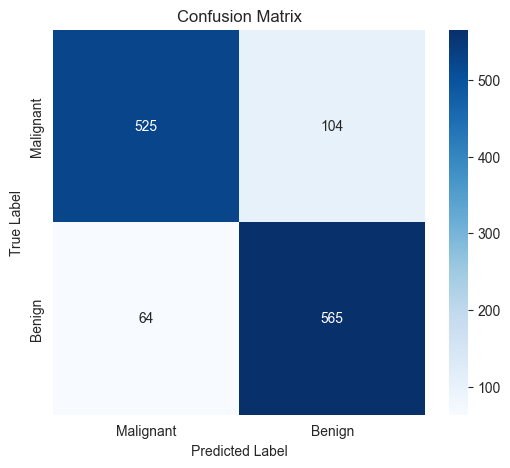

In [39]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from tensorflow.keras import models, layers, regularizers

In [42]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25)) 
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))  
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

input_shape = (224, 224, 3)  
num_classes = 1  

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

In [44]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.7995 - loss: 0.5422 - val_accuracy: 0.8347 - val_loss: 0.4783
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 142s 226ms/step - accuracy: 0.8284 - loss: 0.4525 - val_accuracy: 0.8235 - val_loss: 0.4584
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 146s 232ms/step - accuracy: 0.8291 - loss: 0.4361 - val_accuracy: 0.8060 - val_loss: 0.4961
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 146s 231ms/step - accuracy: 0.8379 - loss: 0.4242 - val_accuracy: 0.8227 - val_loss: 0.4572
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 911s 1s/step - accuracy: 0.8417 - loss: 0.4237 - val_accuracy: 0.8331 - val_loss: 0.4440


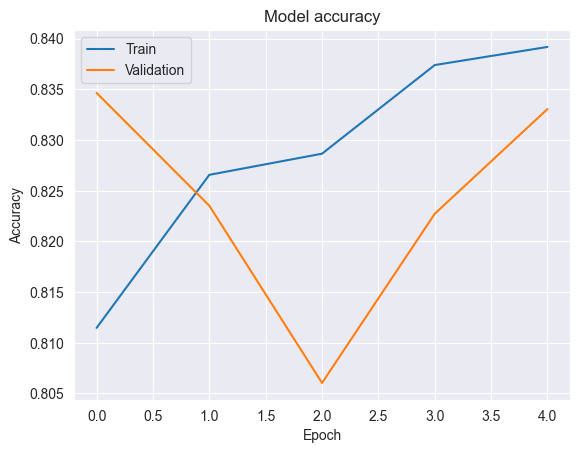

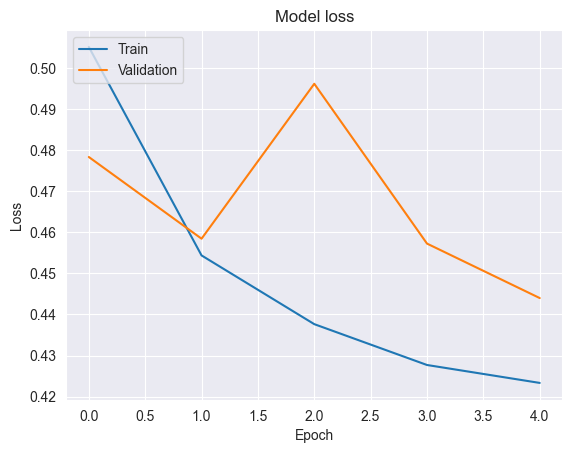

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step


In [47]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.81      0.83      0.82       629
   Malignant       0.82      0.80      0.81       629

    accuracy                           0.82      1258
   macro avg       0.82      0.82      0.82      1258
weighted avg       0.82      0.82      0.82      1258



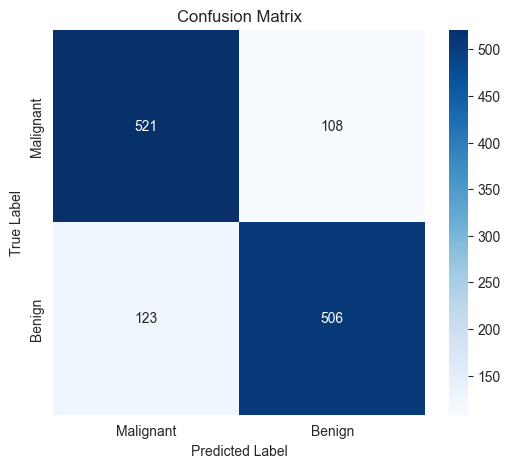

In [48]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(1, activation='sigmoid'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 48s 1us/step


In [50]:
history = cnn_model.fit(
    train_gen_new, 
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 347s 546ms/step - accuracy: 0.7722 - loss: 0.5047 - val_accuracy: 0.8665 - val_loss: 0.3241
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 362s 575ms/step - accuracy: 0.8636 - loss: 0.3302 - val_accuracy: 0.8609 - val_loss: 0.3272
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 367s 583ms/step - accuracy: 0.8671 - loss: 0.3098 - val_accuracy: 0.8649 - val_loss: 0.3080
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 365s 581ms/step - accuracy: 0.8791 - loss: 0.2819 - val_accuracy: 0.8688 - val_loss: 0.2940
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 371s 590ms/step - accuracy: 0.8862 - loss: 0.2658 - val_accuracy: 0.8776 - val_loss: 0.2848
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 369s 587ms/step - accuracy: 0.8988 - loss: 0.2501 - val_accuracy: 0.8839 - val_loss: 0.2749
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 457s 727ms/step - accuracy: 0.9086 - loss: 0.2276 - val_accuracy: 0.8776 - val_loss: 0.3144
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 384s 610ms/step - accuracy: 0.9127 -

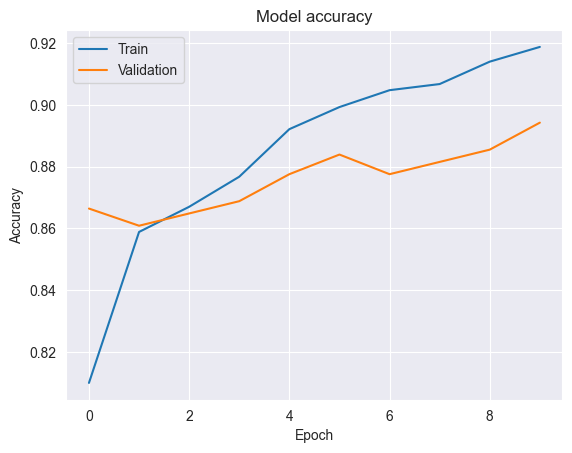

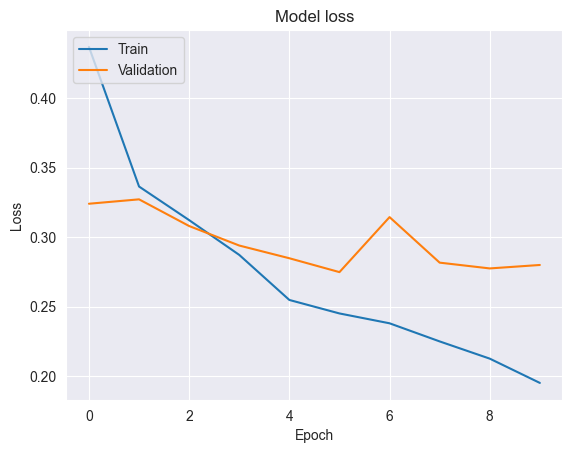

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 476ms/step


In [53]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.90      0.89      0.89       629
   Malignant       0.89      0.90      0.89       629

    accuracy                           0.89      1258
   macro avg       0.89      0.89      0.89      1258
weighted avg       0.89      0.89      0.89      1258



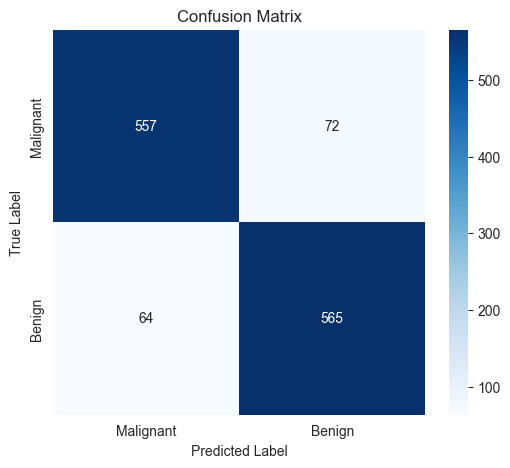

In [54]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from tensorflow.keras.applications import InceptionV3

In [56]:
def create_inception_model(input_shape):
   
    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    
    model.add(GaussianNoise(0.25))  
    
    model.add(GlobalAveragePooling2D())  
    
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    
    model.add(Dense(1, activation='sigmoid'))  

    return model

In [57]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise

In [58]:
input_shape = (224, 224, 3)  
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


In [59]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [60]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 188s 290ms/step - accuracy: 0.7894 - loss: 0.4730 - val_accuracy: 0.8625 - val_loss: 0.3584
Epoch 2/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.8463 - loss: 0.3591 - val_accuracy: 0.8577 - val_loss: 0.3369
Epoch 3/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.8613 - loss: 0.3281 - val_accuracy: 0.8688 - val_loss: 0.3316
Epoch 4/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 208s 331ms/step - accuracy: 0.8727 - loss: 0.2999 - val_accuracy: 0.8514 - val_loss: 0.3432
Epoch 5/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 186s 295ms/step - accuracy: 0.8822 - loss: 0.2842 - val_accuracy: 0.8688 - val_loss: 0.3226
Epoch 6/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 186s 296ms/step - accuracy: 0.8888 - loss: 0.2670 - val_accuracy: 0.8704 - val_loss: 0.3187
Epoch 7/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 297ms/step - accuracy: 0.8962 - loss: 0.2614 - val_accuracy: 0.8529 - val_loss: 0.3433
Epoch 8/10
629/629 ━━━━━━━━━━━━━━━━━━━━ 187s 298ms/step - accuracy: 0.8964 -

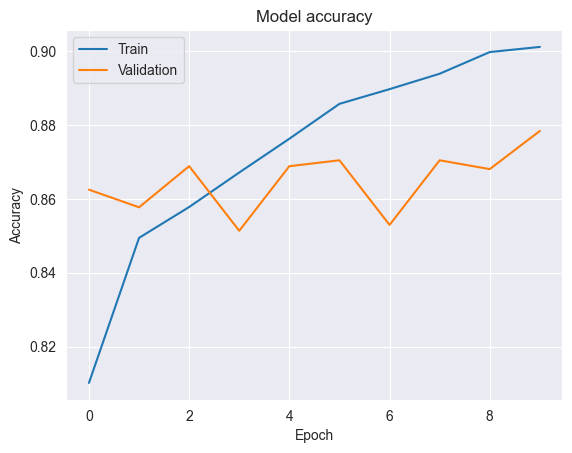

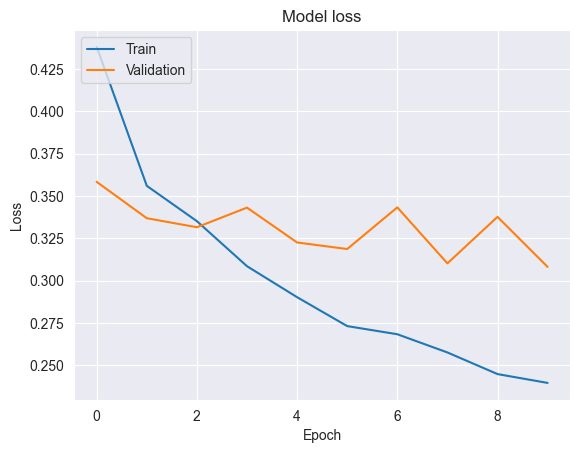

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step


In [63]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.86      0.90      0.88       629
   Malignant       0.89      0.86      0.87       629

    accuracy                           0.88      1258
   macro avg       0.88      0.88      0.88      1258
weighted avg       0.88      0.88      0.88      1258



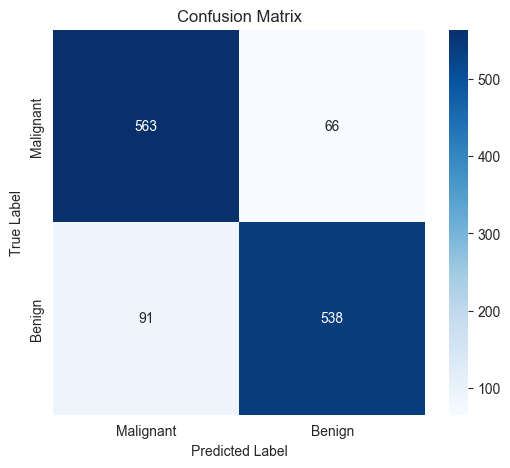

In [64]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [65]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [66]:
def predict_image(model, image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    return prediction

In [67]:

image_path = 'D:/Random/SCAII/archive/test/Malignant/5602.jpg'  
prediction = predict_image(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Malignant (0.75 confidence)


In [68]:
import time

def predict_image_with_time(model, image_path):
    processed_img = preprocess_image(image_path)
    start_time = time.time()
    prediction = model.predict(processed_img)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction, prediction_time

In [69]:
image_path = 'D:/Random/SCAII/archive/test/Malignant/5602.jpg'  
prediction, prediction_time = predict_image_with_time(cnn_model, image_path)

if prediction[0][0] >= 0.5:
    print(f"Prediction: Malignant ({prediction[0][0]:.2f} confidence)")
else:
    print(f"Prediction: Benign ({prediction[0][0]:.2f} confidence)")

print(f"Time taken for prediction: {prediction_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Malignant (0.75 confidence)
Time taken for prediction: 0.0798 seconds


### 1. **CNN Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.88
  - F1-score: 0.87
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.85
  - F1-score: 0.87
- **Overall Accuracy**: 0.87
- **Macro Avg/Weighted Avg F1-score**: 0.87

**Analysis**: The CNN model without regularization performs well with a balanced precision, recall, and f1-score for both classes. Overall, the accuracy is 87%, and the performance is consistent across metrics.

### 2. **CNN Model with Regularization:**
- **Benign:**
  - Precision: 0.91
  - Recall: 0.63
  - F1-score: 0.75
- **Malignant:**
  - Precision: 0.72
  - Recall: 0.94
  - F1-score: 0.81
- **Overall Accuracy**: 0.79
- **Macro Avg/Weighted Avg F1-score**: 0.78

**Analysis**: Adding regularization negatively impacted performance, especially for the **Benign** class, with a sharp decline in recall (0.63). The **Malignant** class benefits from improved recall but at the cost of reduced precision. Overall, accuracy and f1-scores dropped to 79%, indicating a potential imbalance in how the model is generalizing across classes.

### 3. **Xception Model:**
- **Benign:**
  - Precision: 0.86
  - Recall: 0.93
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.92
  - Recall: 0.85
  - F1-score: 0.88
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Xception model shows strong performance with high precision and recall for both **Benign** and **Malignant** classes. Accuracy of 89% and balanced f1-scores indicate good generalization. This is a clear improvement over both the CNN and the regularized CNN models.

### 4. **Inception Model:**
- **Benign:**
  - Precision: 0.90
  - Recall: 0.87
  - F1-score: 0.89
- **Malignant:**
  - Precision: 0.88
  - Recall: 0.90
  - F1-score: 0.89
- **Overall Accuracy**: 0.89
- **Macro Avg/Weighted Avg F1-score**: 0.89

**Analysis**: The Inception model performs similarly to Xception, with 89% accuracy and nearly equal precision, recall, and f1-scores across both classes. This model strikes a good balance between both **Benign** and **Malignant** detection.

### **Conclusion:**
- The **CNN with regularization** struggled with class imbalance, especially for the **Benign** class.
- **Xception and Inception** models achieved the best performance, with both reaching 89% accuracy and well-balanced precision, recall, and f1-scores.
- Between **Xception and Inception**, the performance is very close, and either model could be chosen based on other factors like computational efficiency or ease of deployment.

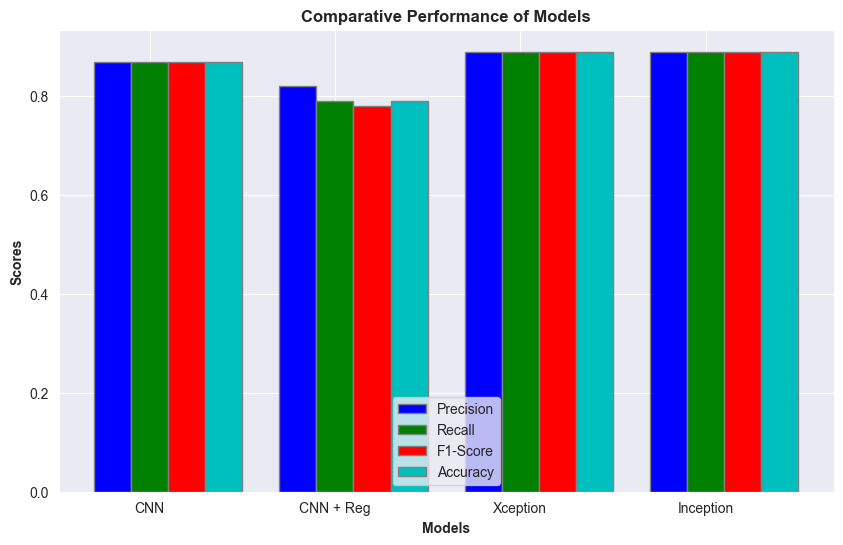

In [70]:
models = ['CNN', 'CNN + Reg', 'Xception', 'Inception']
precision = [0.87, 0.82, 0.89, 0.89]
recall = [0.87, 0.79, 0.89, 0.89]
f1_score = [0.87, 0.78, 0.89, 0.89]
accuracy = [0.87, 0.79, 0.89, 0.89]

bar_width = 0.2

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='c', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparative Performance of Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

plt.legend()

plt.show()